# Cost function & Gradiant Desent algorithem
find values for
coefficient , learning rate,. stop algoritem
when relative cost in
two sequence iteration be 1e-20,
then return coefficient and intercept
hint: use math.isclose(cost, cost_previous, rel_tol=1e-20) 

### Import libraries 

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading data's

In [217]:
# df=pd.read_clipboard().to_csv()
df=pd.read_csv('./scores.xlsx')
df.head()

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83


### Train

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.math.values, df.cs.values, test_size=0.25, random_state=10000)
print ('Train set:\n', X_train,  y_train)
print ('Test set: \n', X_test,  y_test)


Train set:
 [56 92 67 88 35 66 49] [68 98 73 81 30 68 52]
Test set: 
 [80 65 70] [83 66 80]


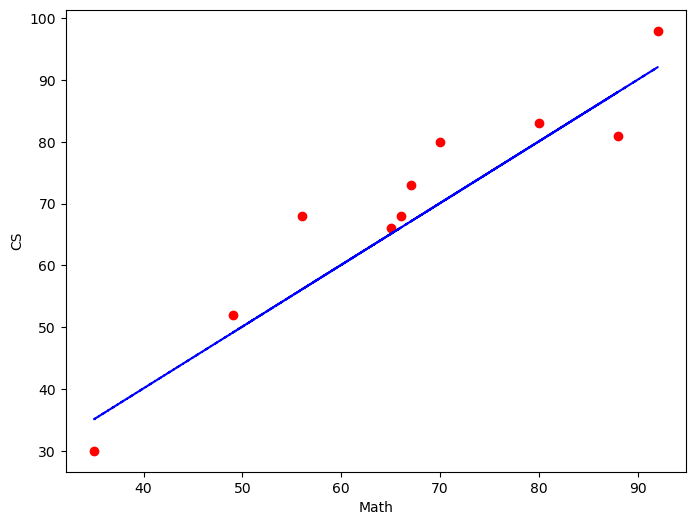

In [219]:
intercept_assump =0.1
coeffi_assump= 1
plt.figure(figsize = (8,6))
plt.scatter(df.math.values, df.cs.values, marker='o', color='red')
plt.plot(X_train ,intercept_assump+coeffi_assump*X_train, color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
plt.xlabel("Math")
plt.ylabel("CS")
plt.show()

### Linear Regression

In [220]:
import math

def cost_function(y_true, y_predicted):
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / 2/len(y_true)
    return cost
 
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, learning_rate = 0.001,stopping_threshold = 1e-5):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 1
    current_bias = .1
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
    i=0
    # Estimation of optimal parameters
    while True:
        i+=1
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculationg the current cost
        current_cost = cost_function(y, y_predicted)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        #if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
 
        if previous_cost and math.isclose(current_cost, previous_cost, rel_tol=stopping_threshold):
            # Visualizing the weights and cost at for all iterations
            plt.figure(figsize = (8,6))
            plt.plot(weights, costs)
            plt.scatter(weights, costs, marker='o', color='red')
            plt.title("Cost vs Coefficient")
            plt.ylabel("Cost")
            plt.xlabel("Coefficient")
            plt.show()
            return current_weight, current_bias , current_cost;

            
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

     
     
    # Data
X = df.math.values
Y = df.cs.values
 # Estimating weight and bias using gradient descent
estimated_weight, eatimated_bias, current_cost = gradient_descent(df.math, df.cs,learning_rate = 1e-4,stopping_threshold=1e-20)
print(f"\n\nEstimated Intercept: {eatimated_bias}\nEstimated coefficient: {estimated_weight}\nCost :{current_cost}")


# Making predictions using estimated parameters
Y_pred = estimated_weight*X + eatimated_bias
 
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot(X, Y_pred, color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
plt.xlabel("Math")
plt.ylabel("CS")
plt.show()
 
    

KeyboardInterrupt: 